In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading dataset
Dataset=pd.read_csv("E:\\..\\DataSets\\iris.csv")

In [4]:
# Viewing first five rows
Dataset.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Overall information about the dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Number of rows and columns
Dataset.shape

(150, 5)

In [8]:
# Describing the dataset
Dataset.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Number of null values
Dataset.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

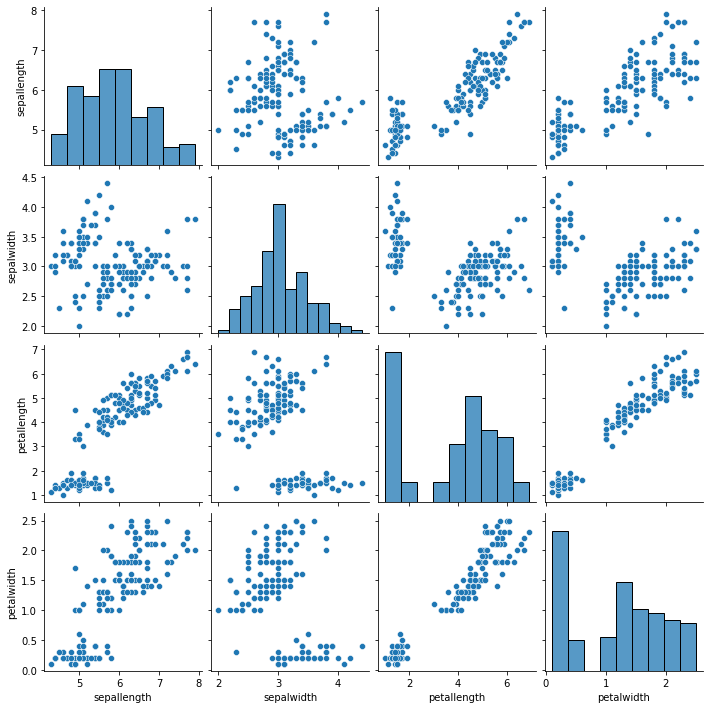

In [15]:
# Pairplot
sns.pairplot(data=Dataset[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']])

In [19]:
# Setting dependent and independent variables
x=Dataset.drop('class',axis=1)
y=Dataset['class']

In [20]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [22]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)

In [25]:
# Fitting the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10, solver='lbfgs', multi_class='auto')
classifier.fit(x_train, y_train)

LogisticRegression(random_state=10)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [27]:
# Printing the confusion matrix
from sklearn.metrics import confusion_matrix
CM= confusion_matrix(y_test, y_pred)
print(CM)
# 14+17+14= 45 values are predicted correctly

[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# Since f1 score is 1 , it has the highest accuracy

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

